# A visualization of an astrophysical simulation

There are two files, "density_projection.dat" and "energy_projection.dat", that contain the gas density and internal energy from a slice of simulated data through a cosmological simulation. Let's read them and make a three color image.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#### Read in the density profile

The file is a 512X512 projection of a 512x512x512 dataset (one 2d layer of a 3d box). The data is written (in hexidecimal) as a 1D array of 512*512 elements that we need to convert a 2d array of 512x512 elements. We can read this using numpy's fromfile() function, and reshape with numpy's reshape() function.

In [2]:
fname = 'session_18/density_projection.dat'
densitydata = np.fromfile(fname, dtype=np.float32)
density = np.reshape(densitydata, (512, 512))

In [4]:
print(densitydata)


[ 94.62272  90.94743  87.59421 ...  96.17582 101.1531  103.28815]


In [5]:
print(density)

[[ 94.62272   90.94743   87.59421  ...  90.911194  96.39209   96.25755 ]
 [ 83.68352   82.20373   81.84568  ...  84.52942   86.64258   88.40807 ]
 [ 77.15729   75.19252   79.863594 ...  75.871254  74.75504   77.103966]
 ...
 [103.68285  102.58708  100.031006 ... 111.8436   102.38032  103.14408 ]
 [106.503555 104.421425 100.59892  ... 101.24035  101.03773  105.9767  ]
 [102.950714  99.325096  95.60295  ...  96.17582  101.1531   103.28815 ]]


#### Repeat for the energy file

In [6]:
fname = 'session_18/energy_projection.dat'
energydata = np.fromfile(fname, dtype=np.float32)
energy = np.reshape(energydata, (512, 512))

#### Let's plot the density

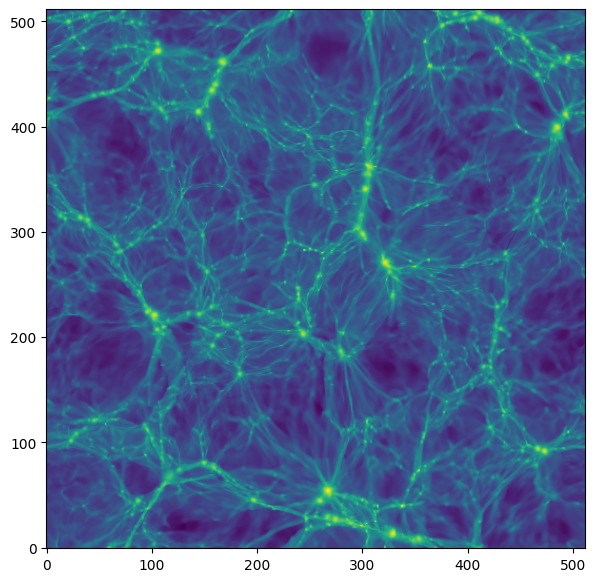

In [8]:
f = plt.figure(figsize=(7,7))
#apply log scale to the values
d_log = np.log10(density) #improves the contrast, because it highlights smaller regions of data
plt.imshow(d_log, origin='lower')

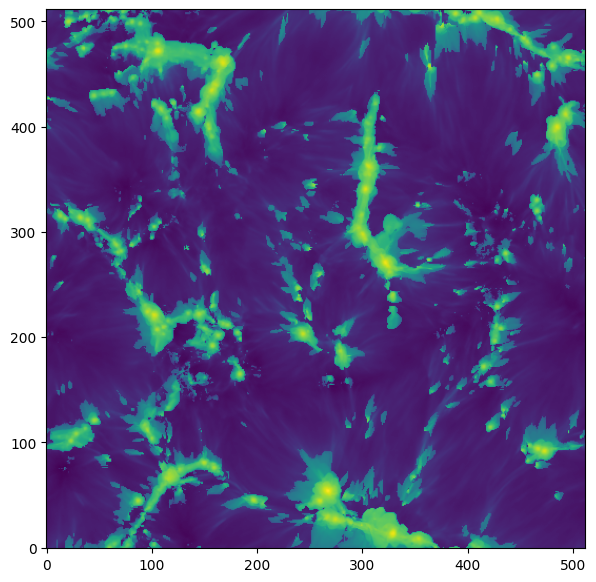

In [9]:
f = plt.figure(figsize=(7,7))
#apply log scale to the values
e_log = np.log10(energy) #improves the contrast, because it highlights smaller regions of data
plt.imshow(e_log, origin='lower')

# Making a 3-color image

We can combine the density and energy maps into a single image by using different colors to seperate both quantities. One way to achieve this is to use the HSV color space. 

Here, H=[0,1] corresponds to the color wheel going from red -> yellow -> green -> cyan -> blue -> purple -> red ->.

S=[0,1] is the saturation of the color, with 0 being white, and 1 being a deep color. 

V=[0, 1] is the value ( or intensity, or brightness) of the color with 0 being black, and 1 is the color defined by H and S

We will map density to V and S, and energy to H.

In [10]:
#find the range of values for d_log
d_min = d_log.min()
d_max = d_log.max()

# d_log = [d_min, d_max] is mapped to V=[0,1] (black -> color)
# v has the same dimenstion as d_log (2D array)
v = (d_log - d_min) / (d_max-d_min)

# with this definition of s,
#d_log=[d_min, d_max] is also mapped to S=[1,0] (white -> color)
s = 1.0 - v

In [18]:
#find the range of values for e_log
e_min = e_log.min()
e_max = e_log.max()

#e_log=[e_min, e_max] is mapped to H=[1, 0.8] (red -> purple)
h = 0.8 - 0.2*(e_log - e_min) / (e_max - e_min)

### Now we have to make a HSV iamge, and convert this to RGB

In [19]:
hsv_image = np.zeros((512, 512, 3))

hsv_image[:,:,0] = h
hsv_image[:,:,1] = s
hsv_image[:,:,2] = v

rgb_convert = colors.hsv_to_rgb(hsv_image)

#### Now let's see the 3-color image

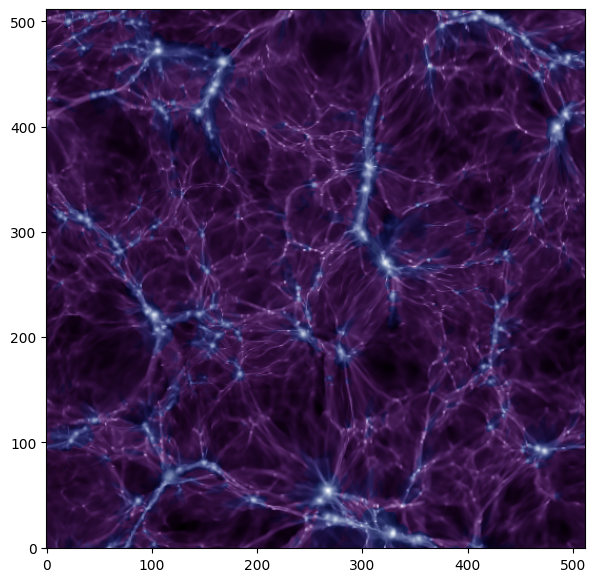

In [20]:
f = plt.figure(figsize=(7,7))
plt.imshow(rgb_convert, origin='lower')

#### What if we try to use the RGB scheme instead

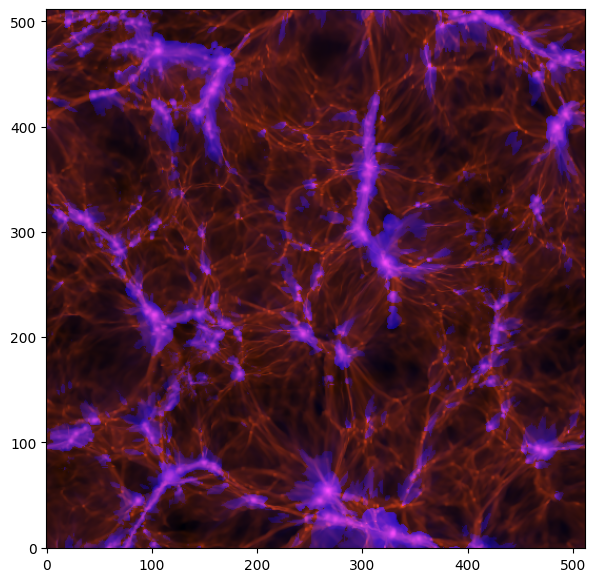

In [23]:
rgb_image = np.zeros((512,512,3))

#density is mapped to red
rgb_image[:,:,0] = (d_log - d_min) / (d_max-d_min)
rgb_image[:,:,1] = 0.3*(d_log - d_min) / (d_max - d_min)
#energy is mapped to blue
rgb_image[:,:,2] = (e_log - e_min) / (e_max-e_min)

f = plt.figure(figsize=(7,7))
plt.imshow(rgb_image, origin='lower')